# Cubic root solver

This notebook documents the details of the cubic root finder.  The main application of the root finder is solving cubic equations of state.  The root finder uses the cubic formula and provides first and second derivatives with respect to the cubic coefficients.

Cubics are in the form:

$$ 0 = z^3 + bz^2 + cz + d $$

There are functions for returning each of three real roots.  If a real root doesn't exist for the selected root, there are three options.

1. Return an error
2. Return the real root that does exist.
3. Return a real root given by a smooth cubic extension.

For use in cubic equations of state, the returning the real root that does exist is the safest option.  When a phase doesn't exist the root for that phase doesn't matter, so when the root for the phase also doesn't exist the fact the root for the wrong phase is used shouldn't matter.

The functions provided by the root finder are

```python
z_l = f(b,c,d)
z_m = f(b,c,d)
z_h = f(b,c,d)
```

The functions can be called by solvers through the ASL interface so first and second derivatives of z with respect to b, c, and d are required. 

## Basic derivatives

The derivatives of the cubic equation can be found implicitly.

First we can solve for the coefficients in the cubic.

$$ b = -z - \frac{c}{z} - \frac{d}{z^2} $$

$$ c = -z^2 - bz -\frac{d}{z} $$

$$ d = -z^3 - bz^2 - cz $$

First partial derivatives w.r.t. b:

$$ \frac{\partial b}{\partial z} = -1 + \frac{c}{z^2} + \frac{2d}{z^3} $$

$$ \frac{\partial z}{\partial b} = \left(-1 + \frac{c}{z^2} + \frac{2d}{z^3}\right)^{-1} $$

First partial derivatives w.r.t. c:

$$ \frac{\partial c}{\partial z} = -2z -b + \frac{d}{z^2} $$

$$ \frac{\partial z}{\partial c} = \left(-2z - b + \frac{d}{z^2}\right)^{-1} $$

First partial derivatives w.r.t. d:

$$ \frac{\partial d}{\partial z} = -3z^2 - 2bz - c $$

$$ \frac{\partial z}{\partial d} = \left(-3z^2 - 2bz - c\right)^{-1} $$

Second partial derivatives w.r.t. b,b; b,c; and b,d:

$$\frac{\partial^2z}{\partial b^2} = \left(\frac{\partial z}{\partial b} \right)^3 \left(\frac{2c}{z^3} + \frac{6d}{z^4} \right) $$

$$\frac{\partial^2z}{\partial b \partial c} = \left(\frac{\partial z}{\partial b} \right)^2 \left(\frac{2c}{z^3}\frac{\partial z}{\partial c} + \frac{6d}{z^4}\frac{\partial z}{\partial c} -\frac{1}{z^2}\right) $$

$$\frac{\partial^2z}{\partial b \partial d} = \left(\frac{\partial z}{\partial b} \right)^2 \left(\frac{2c}{z^3}\frac{\partial z}{\partial d} + \frac{6d}{z^4}\frac{\partial z}{\partial d} -\frac{2}{z^3}\right) $$

Second partial derivatives w.r.t c,c and c,d:

$$ \frac{\partial^2z}{\partial c^2} = \left(\frac{\partial z}{\partial c} \right)^3 \left(2 + \frac{2d}{z^3} \right)$$

$$ \frac{\partial^2z}{\partial c \partial d} = \left(\frac{\partial z}{\partial c} \right)^2 \left(2\frac{\partial z}{\partial d} + \frac{2d}{z^3}\frac{\partial z}{\partial d} - \frac{1}{z^2} \right)$$

Second partial derivatives w.r.t d,d:

$$\frac{\partial^2z}{\partial d^2} = \left(\frac{\partial z}{\partial d} \right)^3 \left(6z + 2b \right)$$

## Cubic Formula

The roots of the cubic equation can be found with the cubic formula.  There are two main possible situations for real roots of a cubic.  There can be one real root or three.  If there are three real roots, the middle root and the high root or the middle root and the low root can be the same.  If there is one real root, it is classified as the high or low root by whether the root is higher or lower than the inflection point.

The root finding approach given in "CRC Standard Mathematical Tables and Formulae 32nd edition" pg 68 was used to identify the roots. There may be a mistake in it depending on your printing, if you want to check on it also check out the errata: http://www.mathtable.com/smtf/.

$$ F = \frac{3c - b^2}{3.0} $$

$$ G = \frac{2b^3 - 9bc + 27d}{27.0} $$

$$ H = \frac{G^2}{4.0} + \frac{F^3}{27.0} $$

$$ P = \frac{-b}{3.0} $$

P is the inflection point.

If H <= 0 there are three roots (including double or triple roots), so calculate these terms:

$$ I = \sqrt{\frac{G^2}{4.0} - H} $$

$$ J = I^{1/3} $$

$$ K = \arccos\left(\frac{-G}{2I}\right) $$

$$ M = \cos\left(\frac{K}{3}\right) $$
      
$$ N = \sqrt{3}\sin\left(\frac{K}{3}\right) $$

$$ z_1 = P + 2JM $$
      
$$ z_2 = P - J(M + N) $$
      
$$ z_3 = P - J(M - N) $$

The three roots can be sorted to return the low, middle, or high root.
      
If H > 0 there is only one real root, so calculate these terms:

$$ R = \frac{-G}{2} + \sqrt{H} $$

$$ T = \frac{-G}{2} - \sqrt{H} $$

$$ S = R^{1/3} $$

$$ U = T^{1/3} $$

$$ z = S + U + P $$



## Extended Cubic and Derivatives

There are two extended cubics one for the lower root and one for the upper root.  These consist of a part from the origial cubic and an extended part to provide a mock root.  The goal here is to provide a smooth function for the cubic roots.  The idea is that when you get a mock root, the value won't change the solution to the problem, but because it's smooth(ish), the solver won't get tripped up by root calculating functions.

The extended cubic is derived by translating the original cubic, so that the critical points line up.  If the turning point for the lower root is below zero, the higher turning point is translated to the lower turning point extending the curve to cross zero.  This is mostly smooth, but the derivatives of z with respect to the cubic coefficents blow up when the solution for z is at the turning point.  A similar process can be used for the higher (vapor) root.  When there are no turning points the extended curve merges with the original curve and the high and low roots are the same.

The original cubic is:

$$0 = \text{f}(z) = z^3 + bz^2 + cz + d$$

$$\frac{\partial f}{\partial b} = z^2 + 3z^2\frac{\partial z}{\partial b} + 2bz\frac{\partial z}{\partial b} + c\frac{\partial z}{\partial b}$$

$$\frac{\partial f}{\partial c} = z + 3z^2\frac{\partial z}{\partial c} + 2bz\frac{\partial z}{\partial c} + c\frac{\partial z}{\partial c}$$

$$\frac{\partial f}{\partial d} = 1 + 3z^2\frac{\partial z}{\partial d} + 2bz\frac{\partial z}{\partial d} + c\frac{\partial z}{\partial d}$$

The turning points, where $\frac{df}{dz} = 0$, are 

$$t_1 = \frac{-2b - \sqrt{4b^2 - 12c}}{6}$$

$$t_2 = \frac{-2b + \sqrt{4b^2 - 12c}}{6}$$

$$\frac{\partial t_1}{\partial b} = \frac{-1 - 2b(4b^2 - 12c)^{-1/2}}{3}$$

$$\frac{\partial t_2}{\partial b} = \frac{-1 + 2b(4b^2 - 12c)^{-1/2}}{3}$$

$$\frac{\partial t_1}{\partial c} = (4b^2 - 12c)^{-1/2}$$

$$\frac{\partial t_2}{\partial c} = -(4b^2 - 12c)^{-1/2}$$

$$\frac{\partial t_1}{\partial d} = 0$$

$$\frac{\partial t_2}{\partial d} = 0$$


#### For the (low) liquid root:

The extended cubic is:

$$x = z - t_1 + t_2$$

$$0 = x^3 + bx^2 + cx + d + \text{f}(t_1) - \text{f}(t_2)$$

Differentiate the cubic equation w.r.t. b:

$$0 = 3x^2\frac{\partial x}{\partial b} + 2bx\frac{\partial x}{\partial b} + x^2 + c\frac{\partial x}{\partial b} + 
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} - 
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}$$

$$0 = \left(3x^2 + 2bx + c\right)\frac{\partial x}{\partial b} + x^2 +
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} - \frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}$$

$$\frac{\partial x}{\partial b} = \frac{\partial z}{\partial b} - \frac{\partial t_1}{\partial b} + \frac{\partial t_2}{\partial b}$$

$$\frac{\partial x}{\partial c} = \frac{\partial z}{\partial c} - \frac{\partial t_1}{\partial c} + \frac{\partial t_2}{\partial c}$$

$$\frac{\partial x}{\partial d} = \frac{\partial z}{\partial d} - \frac{\partial t_1}{\partial d} + \frac{\partial t_2}{\partial d}$$

$$-\left(3x^2 + 2bx + c\right)\frac{\partial z}{\partial b} = 
\left(3x^2 + 2bx + c\right)\left(-\frac{\partial t_1}{\partial b} + \frac{\partial t_2}{\partial b}\right) + x^2 +
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} - \frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}$$

$$A = \left(3x^2 + 2bx + c\right)$$

$$\frac{\partial z}{\partial b} = 
\frac{-x^2 + A\left(\frac{\partial t_1}{\partial b} - \frac{\partial t_2}{\partial b}\right) -
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} + \frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}}{A}$$

Differentiate the cubic equation w.r.t. c:

$$\frac{\partial z}{\partial c} = 
\frac{-x + A\left(\frac{\partial t_1}{\partial c} - \frac{\partial t_2}{\partial c}\right) -
\frac{\partial\text{f}}{\partial c}\Bigr|_{t_1} + \frac{\partial\text{f}}{\partial c}\Bigr|_{t_2}}{A}$$

Differentiate the cubic equation w.r.t. d:

$$ \frac{\partial z}{\partial d} = 
\frac{-1 + A\left(\frac{\partial t_1}{\partial d} - \frac{\partial t_2}{\partial d}\right) -
\frac{\partial\text{f}}{\partial d}\Bigr|_{t_1} + \frac{\partial\text{f}}{\partial d}\Bigr|_{t_2}}{A}$$

$$\frac{\partial z}{\partial d} = -\frac{1}{A}$$

#### For the (high) vapor root:

The extended cubic is:

$$x = z + t_1 - t_2$$

$$0 = x^3 + bx^2 + cx + d - \text{f}(t_1) + \text{f}(t_2)$$

Differentiate the cubic equation w.r.t. b:

$$0 = 3x^2\frac{\partial x}{\partial b} + 2bx\frac{\partial x}{\partial b} + x^2 + c\frac{\partial x}{\partial b} - 
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} + \frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}$$

$$0 = \left(3x^2 + 2bx + c\right)\frac{\partial x}{\partial b} + x^2 -
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} + \frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}$$

$$\frac{\partial x}{\partial b} = \frac{\partial z}{\partial b} + \frac{\partial t_1}{\partial b} - \frac{\partial t_2}{\partial b}$$

$$\frac{\partial x}{\partial c} = \frac{\partial z}{\partial c} + \frac{\partial t_1}{\partial c} - \frac{\partial t_2}{\partial c}$$

$$\frac{\partial x}{\partial d} = \frac{\partial z}{\partial d} + \frac{\partial t_1}{\partial d} - \frac{\partial t_2}{\partial d}$$

$$-\left(3x^2 + 2bx + c\right)\frac{\partial z}{\partial b} = 
\left(3x^2 + 2bx + c\right)\left(\frac{\partial t_1}{\partial b} - \frac{\partial t_2}{\partial b}\right) + x^2 -
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} + \frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}$$

$$A = \left(3x^2 + 2bx + c\right)$$

$$\frac{\partial z}{\partial b} = 
\frac{-x^2 + A\left(-\frac{\partial t_1}{\partial b} + \frac{\partial t_2}{\partial b}\right) +
\frac{\partial\text{f}}{\partial b}\Bigr|_{t_1} - \frac{\partial\text{f}}{\partial b}\Bigr|_{t_2}}{A}$$

Differentiate the cubic equation w.r.t. c:

$$\frac{\partial z}{\partial c} = 
\frac{-x + A\left(-\frac{\partial t_1}{\partial c} + \frac{\partial t_2}{\partial c}\right) +
\frac{\partial\text{f}}{\partial c}\Bigr|_{t_1} - \frac{\partial\text{f}}{\partial c}\Bigr|_{t_2}}{A}$$

Differentiate the cubic equation w.r.t. d:

$$ \frac{\partial z}{\partial d} = 
\frac{-1 + A\left(-\frac{\partial t_1}{\partial d} + \frac{\partial t_2}{\partial d}\right) +
\frac{\partial\text{f}}{\partial d}\Bigr|_{t_1} - \frac{\partial\text{f}}{\partial d}\Bigr|_{t_2}}{A}$$

$$\frac{\partial z}{\partial d} = -\frac{1}{A}$$

### Second Derivatives of Extension

Will need derivatives of A.

$$\frac{\partial A}{\partial b} = 2x + 6x\frac{\partial x}{\partial b} + 2b\frac{\partial x}{\partial b}$$
$$\frac{\partial A}{\partial c} = 1 + 6x\frac{\partial x}{\partial c} + 2b\frac{\partial x}{\partial c}$$
$$\frac{\partial A}{\partial d} = 6x\frac{\partial x}{\partial d} + 2b\frac{\partial x}{\partial d}$$

And second derivitives of f (don't need them w.r.t. d).

$$\frac{\partial^2 \text{f}}{\partial b^2} = 2z\frac{\partial z}{\partial b} + 6z\left(\frac{\partial z}{\partial b} \right)^2
 + 3z^2\frac{\partial^2 z}{\partial b^2} + 2z\frac{\partial z}{\partial b} + 2b\left(\frac{\partial z}{\partial b}\right)^2
 + 2bz\frac{\partial^2 z}{\partial b^2} + c\frac{\partial^2 z}{\partial b^2}$$
 
$$\frac{\partial^2 \text{f}}{\partial b \partial c} = 2z\frac{\partial z}{\partial c} + 6z\frac{\partial z}{\partial b}\frac{\partial z}{\partial c}
 + 3z^2\frac{\partial^2 z}{\partial b \partial c} + 2b\frac{\partial z}{\partial b}\frac{\partial z}{\partial c} +
 2bz\frac{\partial^2 z}{\partial b \partial c} + c\frac{\partial^2 z}{\partial b \partial c} + \frac{\partial z}{\partial b}$$
 
$$\frac{\partial^2 \text{f}}{\partial c^2} = \frac{\partial z}{\partial c} + 6z\left(\frac{\partial z}{\partial c}\right)^2
 + 3z^2\frac{\partial^2 z}{\partial c^2} + 2b\left(\frac{\partial z}{\partial c}\right)^2 +
 2bz\frac{\partial^2 z}{\partial c^2} + c\frac{\partial^2 z}{\partial c^2} + \frac{\partial z}{\partial c}$$

And second derivatives on $t_1$ and $t_2$.

$$ \frac{\partial^2 t_1}{\partial b^2} = -\frac{2}{3}\left(4b^2 - 12c\right)^{(-1/2)} + \frac{8}{3}b^2\left(4b^2 - 12c\right)^{(-3/2)}$$
$$ \frac{\partial^2 t_2}{\partial b^2} = \frac{2}{3}\left(4b^2 - 12c\right)^{(-1/2)} - \frac{8}{3}b^2\left(4b^2 - 12c\right)^{(-3/2)}$$

$$ \frac{\partial^2 t_1}{\partial b \partial c} = -4b\left(4b^2 - 12c\right)^{(-3/2)} $$
$$ \frac{\partial^2 t_2}{\partial b \partial c} = 4b\left(4b^2 - 12c\right)^{(-3/2)} $$

$$ \frac{\partial^2 t_1}{\partial c^2} = 6\left(4b^2 - 12c\right)^{(-3/2)} $$
$$ \frac{\partial^2 t_2}{\partial c^2} = -6\left(4b^2 - 12c\right)^{(-3/2)} $$

#### Low and High Root Derivatives w.r.t. $d$

The derivatives with respect to $d$ are the same for the low and high root, and pretty simple:

$$\frac{\partial^2 z}{\partial d \partial b} = \frac{1}{A^2}\frac{\partial A}{\partial b}$$
$$\frac{\partial^2 z}{\partial d \partial c} = \frac{1}{A^2}\frac{\partial A}{\partial c}$$
$$\frac{\partial^2 z}{\partial d^2} = \frac{1}{A^2}\frac{\partial A}{\partial d}$$

That leaves the three $b$ and $c$ second derivatives

#### Low Root

$$\frac{\partial^2 z}{\partial b^2} = -\frac{1}{A}\frac{\partial z}{\partial b}\frac{\partial A}{\partial b} + \frac{1}{A}\left( 
-2x\frac{\partial x}{\partial b} + \frac{\partial A}{\partial b}\frac{\partial t_1}{\partial b} + A \frac{\partial^2 t_1}{\partial b^2}
- \frac{\partial A}{\partial b}\frac{\partial t_2}{\partial b} - A \frac{\partial^2 t_2}{\partial b^2}
- \frac{\partial\text{f}^2}{\partial b^2}\Bigr|_{t_1} + \frac{\partial\text{f}^2}{\partial b^2}\Bigr|_{t_2}\right)$$

$$\frac{\partial^2 z}{\partial b \partial c} = -\frac{1}{A}\frac{\partial z}{\partial b} \frac{\partial A}{\partial c} + \frac{1}{A}\left( 
-2x\frac{\partial x}{\partial c} 
+ \frac{\partial A}{\partial c}\frac{\partial t_1}{\partial b} + A \frac{\partial^2 t_1}{\partial b \partial c}
- \frac{\partial A}{\partial c}\frac{\partial t_2}{\partial b} - A \frac{\partial^2 t_2}{\partial b \partial c}
- \frac{\partial\text{f}^2}{\partial b \partial c}\Bigr|_{t_1} 
+ \frac{\partial\text{f}^2}{\partial b \partial c}\Bigr|_{t_2}\right)$$

$$\frac{\partial^2 z}{\partial c^2} = -\frac{1}{A}\frac{\partial z}{\partial c}\frac{\partial A}{\partial c} + \frac{1}{A}\left( 
-\frac{\partial x}{\partial c} + \frac{\partial A}{\partial c}\frac{\partial t_1}{\partial c} + A \frac{\partial^2 t_1}{\partial c^2}
- \frac{\partial A}{\partial c}\frac{\partial t_2}{\partial c} - A \frac{\partial^2 t_2}{\partial c^2}
- \frac{\partial\text{f}^2}{\partial c^2}\Bigr|_{t_1} + \frac{\partial\text{f}^2}{\partial c^2}\Bigr|_{t_2}\right)$$

#### High Root

$$\frac{\partial^2 z}{\partial b^2} = -\frac{1}{A}\frac{\partial z}{\partial b}\frac{\partial A}{\partial b} + \frac{1}{A}\left( 
-2x\frac{\partial x}{\partial b} - \frac{\partial A}{\partial b}\frac{\partial t_1}{\partial b} - A \frac{\partial^2 t_1}{\partial b^2}
+ \frac{\partial A}{\partial b}\frac{\partial t_2}{\partial b} + A \frac{\partial^2 t_2}{\partial b^2}
+ \frac{\partial\text{f}^2}{\partial b^2}\Bigr|_{t_1} - \frac{\partial\text{f}^2}{\partial b^2}\Bigr|_{t_2}\right)$$

$$\frac{\partial^2 z}{\partial b \partial c} = -\frac{1}{A}\frac{\partial z}{\partial b} \frac{\partial A}{\partial c} + \frac{1}{A}\left( 
-2x\frac{\partial x}{\partial c} 
- \frac{\partial A}{\partial c}\frac{\partial t_1}{\partial b} - A \frac{\partial^2 t_1}{\partial b \partial c}
+ \frac{\partial A}{\partial c}\frac{\partial t_2}{\partial b} + A \frac{\partial^2 t_2}{\partial b \partial c}
+ \frac{\partial\text{f}^2}{\partial b \partial c}\Bigr|_{t_1} 
- \frac{\partial\text{f}^2}{\partial b \partial c}\Bigr|_{t_2}\right)$$

$$\frac{\partial^2 z}{\partial c^2} = -\frac{1}{A}\frac{\partial z}{\partial c}\frac{\partial A}{\partial c} + \frac{1}{A}\left( 
-\frac{\partial x}{\partial c} - \frac{\partial A}{\partial c}\frac{\partial t_1}{\partial c} - A \frac{\partial^2 t_1}{\partial c^2}
+ \frac{\partial A}{\partial c}\frac{\partial t_2}{\partial c} + A \frac{\partial^2 t_2}{\partial c^2}
+ \frac{\partial\text{f}^2}{\partial c^2}\Bigr|_{t_1} - \frac{\partial\text{f}^2}{\partial c^2}\Bigr|_{t_2}\right)$$



## Functions for cubic formula Derivatives and Mock Curves

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

### Basic Cubic Formula

Functions for the cubic formula and derivatives with respect to the coefficients:

In [2]:
def cubic_real_roots(b,c,d):
    F = (3*c - b**2)/3.0
    G = (2*b**3 - 9*b*c + 27*d)/27.0
    H = G**2/4.0 + F**3/27.0
    P = -b/3.0
    if H<=0:
        I = math.sqrt(G**2/4.0 - H)
        J = I**(1/3)
        K = math.acos(-G/2.0/I)
        M = math.cos(K/3)
        N = math.sqrt(3)*math.sin(K/3.0)
        z = (P + 2 * J * M, P - J * (M + N), P - J * (M - N))
        return tuple(sorted(z))
    else:
        R = -G/2.0 + math.sqrt(H)
        T = -G/2.0 - math.sqrt(H)
        if R < 0:
            S = -(-R)**(1/3)
        else:
            S = R**(1/3)
        if T < 0:
            U = -(-T)**(1/3)
        else:
             U = (T)**(1/3)
        z = S + U + P
        if z > P:
            return (None, None, z)
        elif z < P:
            return (z, None, None)
        else: # this it pretty unlikely but whatever
            return (z, z, z)
    
def cubic_real_root_grad(z, b, c, d):
    dzdb = (-1 + c/z**2 + 2*d/z**3)**(-1)
    dzdc = (-2*z - b + d/z**2)**(-1)
    dzdd = (-3*z**2 - 2*b*z - c)**(-1)
    return [dzdb, dzdc, dzdd]
    
def cubic_real_root_hes(z, b, c, d):
    dzdb, dzdc, dzdd = cubic_real_root_grad(z, b, c, d)
    dz2dbdb = dzdb**3*(2*c/z**3 + 6*d/z**4)
    dz2dbdc = dzdb**2*(2*c/z**3*dzdc + 6*d/z**4*dzdc -1/z**2)
    dz2dbdd = dzdb**2*(2*c/z**3*dzdd + 6*d/z**4*dzdd -2/z**3)
    dz2dcdc = dzdc**3*(2+2*d/z**3)
    dz2dcdd = dzdc**2*(2*dzdd + 2*d/z**3*dzdd - 1/z**2)
    dz2dddd = dzdd**3*(6*z+2*b)
    return [dz2dbdb, dz2dbdc, dz2dbdd, dz2dcdc, dz2dcdd, dz2dddd]

### Calculate Roots Based on Mock Curves

In [3]:
def critical_points(b,c):
    """Calculate the critical points of the cubic function.  They are independent of d."""
    det = 4*b**2 - 12*c
    if det < 0:
        return (None, None)
    else:
        t1 = (-2*b - math.sqrt(det))/6
        t2 = (-2*b + math.sqrt(det))/6
    return (t1, t2) 
    
def root_lo(b, c, d, mock=True):
    r = {"root":None, "grad":[None, None, None], "hes":[None, None, None, None, None, None]}
    z = cubic_real_roots(b, c, d)
    if z[0] is not None:
        r["root"] = z[0]
        r["grad"] = cubic_real_root_grad(z[0], b, c, d)
        r["hes"] = cubic_real_root_hes(z[0], b, c, d)
        return r
    if not mock:
        return r
    # get root of extension
    t1, t2 = critical_points(b, c)
    if t1 is None:
        return root_hi(b, c, d, mock)
    ft1 = t1**3 + b*t1**2 + c*t1 + d
    ft2 = t2**3 + b*t2**2 + c*t2 + d
    z_roots = cubic_real_roots(b, c, d - ft2 + ft1)
    z = z_roots[2] + t1 - t2
    x = z - t1 + t2
    A = 3*x**2 + 2*b*x + c
    dt1db = (-1 - 2*b*(4*b**2 - 12*c)**(-1/2))/3.0
    dt2db = (-1 + 2*b*(4*b**2 - 12*c)**(-1/2))/3.0
    dt1dc = (4*b**2 - 12*c)**(-1/2)
    dt2dc = -(4*b**2 - 12*c)**(-1/2)
    dfdb_at_t1 = t1**2 + 3*t1**2*dt1db + 2*b*t1*dt1db + c*dt1db
    dfdb_at_t2 = t2**2 + 3*t2**2*dt2db + 2*b*t2*dt2db + c*dt2db
    dfdc_at_t1 = t1 + 3*t1**2*dt1dc + 2*b*t1*dt1dc + c*dt1dc
    dfdc_at_t2 = t2 + 3*t2**2*dt2dc + 2*b*t2*dt2dc + c*dt2dc
    r["root"] = z
    r["grad"][0] = (-x**2 + A*(dt1db - dt2db) - dfdb_at_t1 + dfdb_at_t2)/A
    r["grad"][1] = (-x + A*(dt1dc - dt2dc) - dfdc_at_t1 + dfdc_at_t2)/A
    r["grad"][2] = -1/A
    
    dxdb = r["grad"][0] - dt1db + dt2db
    dxdc = r["grad"][1] - dt1dc + dt2dc
    dxdd = r["grad"][2]
    dAdb = 2*x + 6*x*dxdb + 2*b*dxdb
    dAdc = 1 + 6*x*dxdc + 2*b*dxdc
    dAdd = 6*x*dxdd + 2*b*dxdd
    
    d2t1db2 = -2/3*(4*b**2 - 12*c)**(-1/2) + 8/3*b**2*(4*b**2 - 12*c)**(-3/2)
    d2t2db2 = 2/3*(4*b**2 - 12*c)**(-1/2) - 8/3*b**2*(4*b**2 - 12*c)**(-3/2)
    d2t1dbdc = -4*b*(4*b**2 - 12*c)**(-3/2)
    d2t2dbdc = 4*b*(4*b**2 - 12*c)**(-3/2)
    d2t1dc2 = 6*(4*b**2 - 12*c)**(-3/2)
    d2t2dc2 = -6*(4*b**2 - 12*c)**(-3/2)
    d2fdb2_at_t1 = 2*t1*dt1db + 6*t1*dt1db**2 + 3*t1**2*d2t1db2 + 2*t1*dt1db + 2*b*dt1db**2 + 2*b*t1*d2t1db2 + c*d2t1db2
    d2fdb2_at_t2 = 2*t2*dt2db + 6*t2*dt2db**2 + 3*t2**2*d2t2db2 + 2*t2*dt2db + 2*b*dt2db**2 + 2*b*t2*d2t2db2 + c*d2t2db2
    d2fdbdc_at_t1 = 2*t1*dt1dc + 6*t1*dt1db*dt1dc + 3*t1**2*d2t1dbdc + 2*b*dt1db*dt1dc + 2*b*t1*d2t1dbdc + c*d2t1dbdc + dt1db
    d2fdbdc_at_t2 = 2*t2*dt2dc + 6*t2*dt2db*dt2dc + 3*t2**2*d2t2dbdc + 2*b*dt2db*dt2dc + 2*b*t2*d2t2dbdc + c*d2t2dbdc + dt2db
    d2fdc2_at_t1 = dt1dc + 6*t1*dt1dc**2 + 3*t1**2*d2t1dc2 + 2*b*dt1dc**2 + 2*b*t1*d2t1dc2 + c*d2t1dc2 + dt1dc
    d2fdc2_at_t2 = dt2dc + 6*t2*dt2dc**2 + 3*t2**2*d2t2dc2 + 2*b*dt2dc**2 + 2*b*t2*d2t2dc2 + c*d2t2dc2 + dt2dc
    
    r["hes"][0] = -1/A*r["grad"][0]*dAdb + 1/A*(-2*x*dxdb + dAdb*dt1db + A*d2t1db2 - dAdb*dt2db - A*d2t2db2 - d2fdb2_at_t1 + d2fdb2_at_t2)
    r["hes"][1] = -1/A*r["grad"][0]*dAdc + 1/A*(-2*x*dxdc + dAdc*dt1db + A*d2t1dbdc - dAdc*dt2db - A*d2t2dbdc - d2fdbdc_at_t1 + d2fdbdc_at_t2)
    r["hes"][2] = 1/A**2*dAdb
    r["hes"][3] = -1/A*r["grad"][1]*dAdc + 1/A*(-dxdc + dAdc*dt1dc + A*d2t1dc2 - dAdc*dt2dc - A*d2t2dc2 - d2fdc2_at_t1 + d2fdc2_at_t2)
    r["hes"][4] = 1/A**2*dAdc
    r["hes"][5] = 1/A**2*dAdd
    return r

def root_hi(b, c, d, mock=True):
    r = {"root":None, "grad":[None, None, None], "hes":[None, None, None, None, None, None]}
    z = cubic_real_roots(b, c, d)
    if z[2] is not None:
        r["root"] = z[2]
        r["grad"] = cubic_real_root_grad(z[2], b, c, d)
        r["hes"] = cubic_real_root_hes(z[2], b, c, d)
        return r
    if not mock:
        return r
    # get root of extension
    t1, t2 = critical_points(b, c)
    if t1 is None:
        return root_lo(b, c, d, mock)
    ft1 = t1**3 + b*t1**2 + c*t1 + d
    ft2 = t2**3 + b*t2**2 + c*t2 + d
    z_roots = cubic_real_roots(b, c, d + ft2 - ft1)
    z = z_roots[0] - t1 + t2
    x = z + t1 - t2
    A = 3*x**2 + 2*b*x + c
    dt1db = (-1 - 2*b*(4*b**2 - 12*c)**(-1/2))/3.0
    dt2db = (-1 + 2*b*(4*b**2 - 12*c)**(-1/2))/3.0
    dt1dc = (4*b**2 - 12*c)**(-1/2)
    dt2dc = -(4*b**2 - 12*c)**(-1/2)
    dfdb_at_t1 = t1**2 + 3*t1**2*dt1db + 2*b*t1*dt1db + c*dt1db
    dfdb_at_t2 = t2**2 + 3*t2**2*dt2db + 2*b*t2*dt2db + c*dt2db
    dfdc_at_t1 = t1 + 3*t1**2*dt1dc + 2*b*t1*dt1dc + c*dt1dc
    dfdc_at_t2 = t2 + 3*t2**2*dt2dc + 2*b*t2*dt2dc + c*dt2dc
    r["root"] = z
    r["grad"][0] = (-x**2 + A*(-dt1db + dt2db) + dfdb_at_t1 - dfdb_at_t2)/A
    r["grad"][1] = (-x + A*(-dt1dc + dt2dc) + dfdc_at_t1 - dfdc_at_t2)/A
    r["grad"][2] = -1/A
    dxdb = r["grad"][0] + dt1db - dt2db
    dxdc = r["grad"][1] + dt1dc - dt2dc
    dxdd = r["grad"][2]
    dAdb = 2*x + 6*x*dxdb + 2*b*dxdb
    dAdc = 1 + 6*x*dxdc + 2*b*dxdc
    dAdd = 6*x*dxdd + 2*b*dxdd

    d2t1db2 = -2/3*(4*b**2 - 12*c)**(-1/2) + 8/3*b**2*(4*b**2 - 12*c)**(-3/2)
    d2t2db2 = 2/3*(4*b**2 - 12*c)**(-1/2) - 8/3*b**2*(4*b**2 - 12*c)**(-3/2)
    d2t1dbdc = -4*b*(4*b**2 - 12*c)**(-3/2)
    d2t2dbdc = 4*b*(4*b**2 - 12*c)**(-3/2)
    d2t1dc2 = 6*(4*b**2 - 12*c)**(-3/2)
    d2t2dc2 = -6*(4*b**2 - 12*c)**(-3/2)
    d2fdb2_at_t1 = 2*t1*dt1db + 6*t1*dt1db**2 + 3*t1**2*d2t1db2 + 2*t1*dt1db + 2*b*dt1db**2 + 2*b*t1*d2t1db2 + c*d2t1db2
    d2fdb2_at_t2 = 2*t2*dt2db + 6*t2*dt2db**2 + 3*t2**2*d2t2db2 + 2*t2*dt2db + 2*b*dt2db**2 + 2*b*t2*d2t2db2 + c*d2t2db2
    d2fdbdc_at_t1 = 2*t1*dt1dc + 6*t1*dt1db*dt1dc + 3*t1**2*d2t1dbdc + 2*b*dt1db*dt1dc + 2*b*t1*d2t1dbdc + c*d2t1dbdc + dt1db
    d2fdbdc_at_t2 = 2*t2*dt2dc + 6*t2*dt2db*dt2dc + 3*t2**2*d2t2dbdc + 2*b*dt2db*dt2dc + 2*b*t2*d2t2dbdc + c*d2t2dbdc + dt2db
    d2fdc2_at_t1 = dt1dc + 6*t1*dt1dc**2 + 3*t1**2*d2t1dc2 + 2*b*dt1dc**2 + 2*b*t1*d2t1dc2 + c*d2t1dc2 + dt1dc
    d2fdc2_at_t2 = dt2dc + 6*t2*dt2dc**2 + 3*t2**2*d2t2dc2 + 2*b*dt2dc**2 + 2*b*t2*d2t2dc2 + c*d2t2dc2 + dt2dc
    
    r["hes"][0] = -1/A*r["grad"][0]*dAdb + 1/A*(-2*x*dxdb - dAdb*dt1db - A*d2t1db2 + dAdb*dt2db + A*d2t2db2 + d2fdb2_at_t1 - d2fdb2_at_t2)
    r["hes"][1] = -1/A*r["grad"][0]*dAdc + 1/A*(-2*x*dxdc - dAdc*dt1db - A*d2t1dbdc + dAdc*dt2db + A*d2t2dbdc + d2fdbdc_at_t1 - d2fdbdc_at_t2)
    r["hes"][2] = 1/A**2*dAdb
    r["hes"][3] = -1/A*r["grad"][1]*dAdc + 1/A*(-dxdc - dAdc*dt1dc - A*d2t1dc2 + dAdc*dt2dc + A*d2t2dc2 + d2fdc2_at_t1 - d2fdc2_at_t2)
    r["hes"][4] = 1/A**2*dAdc
    r["hes"][5] = 1/A**2*dAdd    
    return r

### Finite Difference

In [4]:
def cubic_real_root_grad_approx_fwd(b, c, d, root="lo", h=1e-4):
    if root == "lo":
        root_func = root_lo
    else:
        root_func = root_hi
    r = root_func(b, c, d)
    z = r["root"]
    zfb = root_func(b + h, c, d)["root"]
    zfc = root_func(b, c + h, d)["root"]
    zfd = root_func(b, c, d + h)["root"]       
    dzdb = (zfb - z)/h
    dzdc = (zfc - z)/h
    dzdd = (zfd - z)/h
    return (dzdb, dzdc, dzdd)

def cubic_real_root_hes_approx_fwd(b, c, d, root="lo", h=1e-4):
    if root == "lo":
        root_func = root_lo
    else:
        root_func = root_hi
    r = root_func(b, c, d)
    z = r["root"]
    rb = root_func(b + h, c, d)
    rc = root_func(b, c + h, d)
    rd = root_func(b, c, d + h)
    zfb = rb["root"]
    zfc = rc["root"]
    zfd = rd["root"]
    dzdb, dzdc, dzdd = r["grad"]
    dzfbdb, dzfbdc, dzfbdd = rb["grad"]
    dzfcdb, dzfcdc, dzfcdd = rc["grad"]
    dzfddb, dzfddc, dzfddd = rd["grad"]
    dz2dbdb = (dzfbdb - dzdb)/h
    dz2dbdc = (dzfbdc - dzdc)/h
    dz2dbdd = (dzfbdd - dzdd)/h
    dz2dcdc = (dzfcdc - dzdc)/h
    dz2dcdd = (dzfcdd - dzdd)/h
    dz2dddd = (dzfddd - dzdd)/h
    return (dz2dbdb, dz2dbdc, dz2dbdd, dz2dcdc, dz2dcdd, dz2dddd)

### Functions to Plot Mock Curves

In [5]:
def mock_cubic(b, c, d, x, r="lo"):
    """Ruturn a f(x) for a mock cubic function where the original has the form:
    
        f(x) = x**3 + b*x**2 + c*x + d
    
    The purpose of the mock curves is to provide a real root even when the cubic does
    not have a high or low real root.  To construct the mock cureves, the part of the
    cubic between turing points is removed.  The two new curves are created by 
    translating the other halves of the remaining curves to meet where the middle was
    cut out.  If the cubic does not have turning points, the mock curves and the
    origianl cubic are the same.
    
    If r is "lo" give f(x) on the liquid side mock curve. If r is "hi" give f(x) on the
    vapor side mock curve. If r is not "lo" or "hi" give f(x) on the original cubic.
    """
    t1, t2 = critical_points(b, c)
    inflection = -b/3.0    
    if t1 is None:
        t1, t2 = (inflection, inflection)
    ft1 = t1**3 + b*t1**2 + c*t1 + d
    ft2 = t2**3 + b*t2**2 + c*t2 + d
    
    if r == "lo" and x > t1:
        return (x - t1 + t2)**3 + b*(x - t1 + t2)**2 + c*(x - t1 + t2) + d - ft2 + ft1
    elif r == "hi" and x < t2:
        return (x - t2 + t1)**3 + b*(x - t2 + t1)**2 + c*(x - t2 + t1) + d + ft2 - ft1
    # On original curve
    return x**3 + b*x**2 + c*x + d

def plot_mock(b, c, d, xlim=(-1, 3), ylim=(-4, 4)):
    """Plot the two mock curves with the original cubic and the position of the
    roots.  If the cubic doesn't have turning points, the curves all line up. 
    """
    zvec = np.linspace(xlim[0], xlim[1], 50)
    fz_lo = [mock_cubic(b, c, d, z, "lo") for z in zvec]
    fz_hi = [mock_cubic(b, c, d, z, "hi") for z in zvec]
    fz_original = [mock_cubic(b, c, d, z, None) for z in zvec]
    plt.plot(zvec, fz_lo, c='darkorange', alpha=0.8, label="Liquid")
    plt.plot(zvec, fz_hi, c='violet', alpha=0.8, label="Vapor")
    plt.plot(zvec, fz_original, c='c', alpha=0.3, label="Cubic")
    plt.grid()
    plt.ylim(ylim[0], ylim[1])
    r_lo = root_lo(b, c, d)
    r_hi = root_hi(b, c, d)
    plt.plot((r_lo["root"], r_lo["root"]), (ylim[0], ylim[1]), c='b', label="Liquid Root")
    plt.plot((r_hi["root"], r_hi["root"]), (ylim[0], ylim[1]), c='g', label="Vapor Root")
    plt.plot((xlim[0], xlim[1]), (0, 0), c='k')
    plt.title(f"(b, c, d) = ({b}, {c}, {d})")
    plt.legend()

## Test Set

In [6]:
test_set = [
    {
        "b": -2.00,
        "c": +0.25,
        "d": -1.50,
    },
    {
        "b": -3.00,
        "c": +0.50,
        "d": +4.00,
    },
    {
        "b": +1.00,
        "c": +0.50,
        "d": +2.00,
    },
    {
        "b": +1.00,
        "c": +0.50,
        "d": -2.00,
    }
]

## Demonstrate the Basic Mock Curve Idea

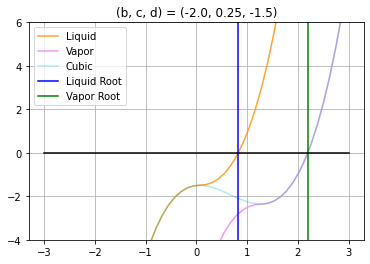

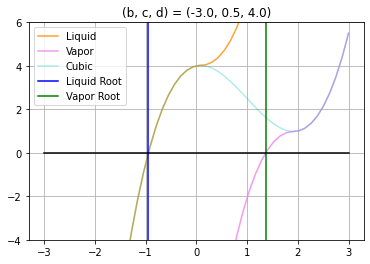

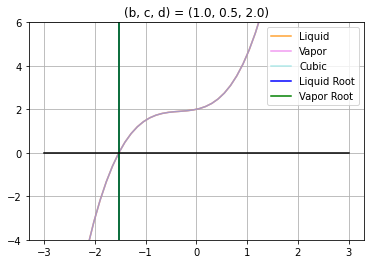

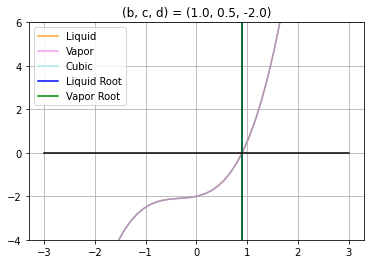

In [7]:
for t in test_set:
    plot_mock(b=t["b"], c=t["c"], d=t["d"], xlim=(-3, 3), ylim=(-4, 6))
    plt.show()

## Test Derivatives

Check that the calculated exact derivatives approximatly agree with the finite differnece approxiamations.

In [8]:
for t in test_set:
    r_lo = root_lo(b=t["b"], c=t["c"], d=t["d"])
    r_hi = root_hi(b=t["b"], c=t["c"], d=t["d"])
    fd_grad_lo = cubic_real_root_grad_approx_fwd(b=t["b"], c=t["c"], d=t["d"], root="lo")
    fd_grad_hi = cubic_real_root_grad_approx_fwd(b=t["b"], c=t["c"], d=t["d"], root="hi")
    fd_hes_lo = cubic_real_root_hes_approx_fwd(b=t["b"], c=t["c"], d=t["d"], root="lo")
    fd_hes_hi = cubic_real_root_hes_approx_fwd(b=t["b"], c=t["c"], d=t["d"], root="hi")
    
    print("===============================================")
    print(f'b={t["b"]}, c={t["c"]}, d={t["d"]}')
    print("-----------------------------------------------")
    print("Gradient low exact vs finite difference")
    print([f"{x:+.5f}" for x in r_lo["grad"]])
    print([f"{x:+.5f}" for x in fd_grad_lo])
    print("Hessian low exact vs finite difference")
    print([f"{x:+.5f}" for x in r_lo["hes"]])
    print([f"{x:+.5f}" for x in fd_hes_lo])
    print("Gradient high exact vs finite difference")
    print([f"{x:+.5f}" for x in r_hi["grad"]])
    print([f"{x:+.5f}" for x in fd_grad_hi])
    print("Hessian high exact vs finite difference")
    print([f"{x:+.5f}" for x in r_hi["hes"]])
    print([f"{x:+.5f}" for x in fd_hes_hi])
    
    tol = 1e-3
    for i, g in enumerate(fd_grad_lo):
        assert abs(g - r_lo["grad"][i]) < tol 
    for i, g in enumerate(fd_grad_hi):
        assert abs(g - r_hi["grad"][i]) < tol
    for i, g in enumerate(fd_hes_lo):
        assert abs(g - r_lo["hes"][i]) < tol 
    for i, g in enumerate(fd_hes_hi):
        assert abs(g - r_hi["hes"][i]) < tol
    
    

b=-2.0, c=0.25, d=-1.5
-----------------------------------------------
Gradient low exact vs finite difference
['+0.17906', '+0.37039', '-0.22250']
['+0.17907', '+0.37040', '-0.22251']
Hessian low exact vs finite difference
['+0.12852', '+0.27996', '-0.02602', '+0.15277', '-0.02514', '-0.09012']
['+0.12853', '+0.27998', '-0.02602', '+0.15279', '-0.02515', '-0.09013']
Gradient high exact vs finite difference
['-0.81227', '-0.36972', '-0.16829']
['-0.81226', '-0.36973', '-0.16829']
Hessian high exact vs finite difference
['+0.18177', '-0.05396', '-0.08678', '-0.08678', '-0.06782', '-0.04376']
['+0.18177', '-0.05396', '-0.08678', '-0.08678', '-0.06782', '-0.04376']
b=-3.0, c=0.5, d=4.0
-----------------------------------------------
Gradient low exact vs finite difference
['-0.10096', '+0.10678', '-0.11293']
['-0.10096', '+0.10678', '-0.11293']
Hessian low exact vs finite difference
['-0.02968', '+0.01999', '-0.00909', '-0.00909', '-0.00314', '+0.01681']
['-0.02968', '+0.01999', '-0.00909

## Behavior of roots with respect to coefficients

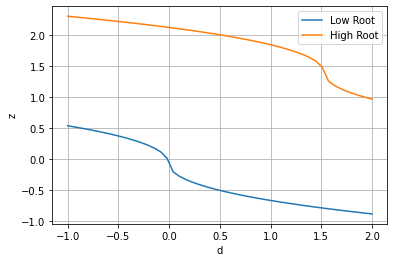

In [9]:
b = -2
c = -0.25
dvec = np.linspace(-1, 2, 50)
z_lo = [root_lo(b, c, d)["root"] for d in dvec]
z_hi = [root_hi(b, c, d)["root"] for d in dvec]
plt.plot(dvec, z_lo, label="Low Root")
plt.plot(dvec, z_hi, label="High Root")
plt.grid()
plt.legend()
plt.xlabel("d")
plt.ylabel("z")
plt.show()

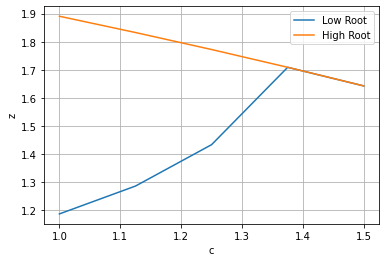

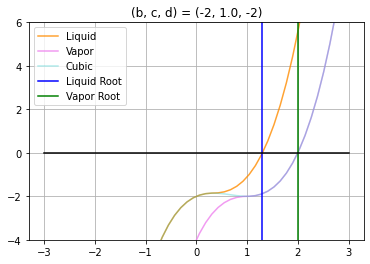

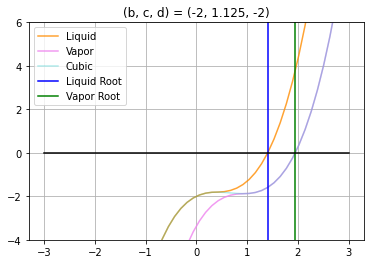

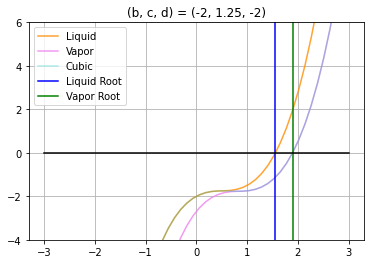

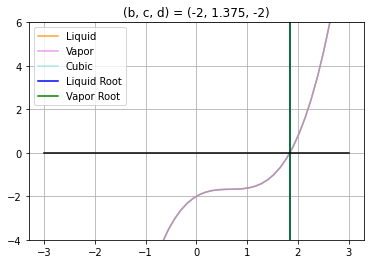

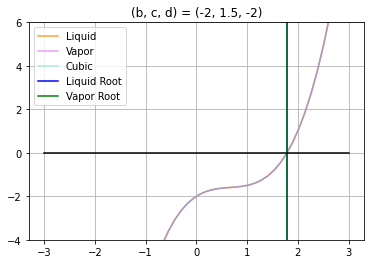

In [10]:
b = -2
d = -1.5
cvec = np.linspace(1, 1.5, 5)
z_lo = [root_lo(b, c, d)["root"] for c in cvec]
z_hi = [root_hi(b, c, d)["root"] for c in cvec]
plt.plot(cvec, z_lo, label="Low Root")
plt.plot(cvec, z_hi, label="High Root")
plt.grid()
plt.legend()
plt.xlabel("c")
plt.ylabel("z")
plt.show()

for c in cvec:
    plot_mock(b=b, c=c, d=b, xlim=(-3, 3), ylim=(-4, 6))
    plt.show()

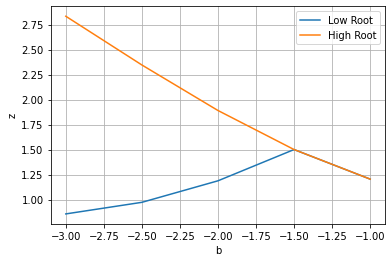

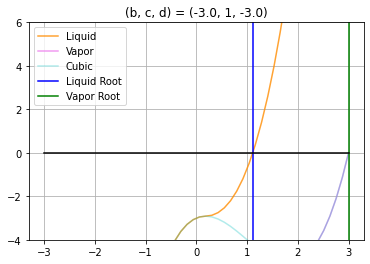

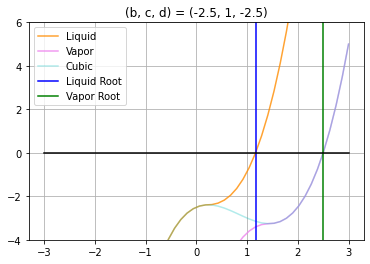

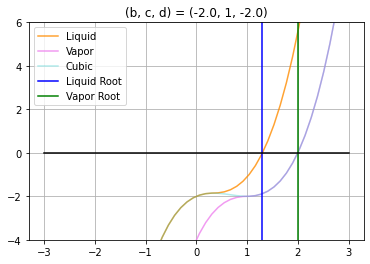

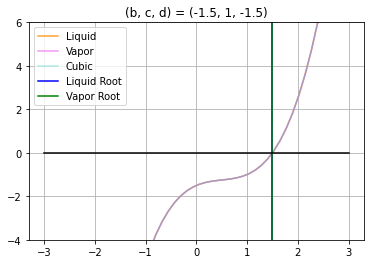

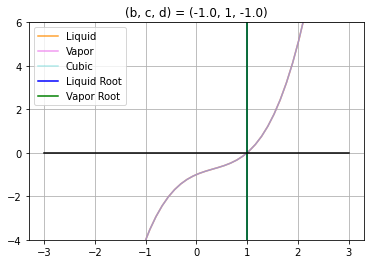

In [11]:
c = 1
d = -1.5
bvec = np.linspace(-3, -1, 5)
z_lo = [root_lo(b, c, d)["root"] for b in bvec]
z_hi = [root_hi(b, c, d)["root"] for b in bvec]
plt.plot(bvec, z_lo, label="Low Root")
plt.plot(bvec, z_hi, label="High Root")
plt.grid()
plt.legend()
plt.xlabel("b")
plt.ylabel("z")
plt.show()

for b in bvec:
    plot_mock(b=b, c=c, d=b, xlim=(-3, 3), ylim=(-4, 6))
    plt.show()

## Test External

In [12]:
import os
import idaes
import pyomo.environ as pyo

In [13]:
m = pyo.ConcreteModel()
m.crl = pyo.ExternalFunction(
    library=os.path.join(idaes.bin_directory, "cubic_roots.so"),
    function="cubic_root_l_ext",
)
m.crh = pyo.ExternalFunction(
    library=os.path.join(idaes.bin_directory, "cubic_roots.so"),
    function="cubic_root_h_ext",
)

In [15]:
for t in test_set:
    r_lo = root_lo(b=t["b"], c=t["c"], d=t["d"])
    r_hi = root_hi(b=t["b"], c=t["c"], d=t["d"])
    z_lo, grad_lo, hes_lo = m.crl.evaluate_fgh(args=(t["b"], t["c"], t["d"]))
    z_hi, grad_hi, hes_hi = m.crh.evaluate_fgh(args=(t["b"], t["c"], t["d"]))

    print("===============================================")
    print(f'b={t["b"]}, c={t["c"]}, d={t["d"]}')
    print("-----------------------------------------------")
    print("Roots")
    print(f'{r_lo["root"]} {r_hi["root"]}')
    print(f'{z_lo} {z_hi}')
    print("Gradient low exact vs ext function")
    print([f"{x:+.5f}" for x in r_lo["grad"]])
    print([f"{x:+.5f}" for x in grad_lo])
    print("Hessian low exact vs ext function")
    print([f"{x:+.5f}" for x in r_lo["hes"]])
    print([f"{x:+.5f}" for x in hes_lo])
    print("Gradient high exact vs ext function")
    print([f"{x:+.5f}" for x in r_hi["grad"]])
    print([f"{x:+.5f}" for x in grad_hi])
    print("Hessian high exact vs ext function")
    print([f"{x:+.5f}" for x in r_hi["hes"]])
    print([f"{x:+.5f}" for x in hes_hi])
    
    tol = 1e-3
    assert abs(z_lo - r_lo["root"]) < tol
    assert abs(z_hi - r_hi["root"]) < tol

    for i, g in enumerate(grad_lo):
        assert abs(g - r_lo["grad"][i]) < tol 
    for i, g in enumerate(grad_hi):
        assert abs(g - r_hi["grad"][i]) < tol
    for i, g in enumerate(hes_lo):
        assert abs(g - r_lo["hes"][i]) < tol 
    for i, g in enumerate(hes_hi):
        assert abs(g - r_hi["hes"][i]) < tol


b=-2.0, c=0.25, d=-1.5
-----------------------------------------------
Roots
0.8283431693142427 2.1969778919885923
0.8283431693142427 2.1969778919885923
Gradient low exact vs ext function
['+0.17906', '+0.37039', '-0.22250']
['+0.17906', '+0.37039', '-0.22250']
Hessian low exact vs ext function
['+0.12852', '+0.27996', '-0.02602', '+0.15277', '-0.02514', '-0.09012']
['+0.12852', '+0.27996', '-0.02602', '+0.15277', '-0.02514', '-0.09012']
Gradient high exact vs ext function
['-0.81227', '-0.36972', '-0.16829']
['-0.81227', '-0.36972', '-0.16829']
Hessian high exact vs ext function
['+0.18177', '-0.05396', '-0.08678', '-0.08678', '-0.06782', '-0.04376']
['+0.18177', '-0.05396', '-0.08678', '-0.08678', '-0.06782', '-0.04376']
b=-3.0, c=0.5, d=4.0
-----------------------------------------------
Roots
-0.9455102065418322 1.367037547027707
-0.9455102065418324 1.367037547027706
Gradient low exact vs ext function
['-0.10096', '+0.10678', '-0.11293']
['-0.10096', '+0.10678', '-0.11293']
Hessian